# 特征工程（回归预测）

## 【任务描述】   
特征工程实践操作:  
1. 熟练掌握特征处理、特征选择的基本流程和方法。      
2. 学会根据实际需求选择合适的特征处理方法。    
3. 能够分析和解决特征处理过程中出现的
    
## 【任务准备】    
1. 学员已完成回归数据预处理实践课程，掌握pandas、Matplotlib、Seaborn、sklearn等数据分析常用库的基本使用。    
2. 准备好用于实践的数据集（本次使用回归数据预处理实践课程得到的已清洗数据）。    

## 【任务实施】    
### 步骤 1: 启动Jupyter Notebook    
+ 在搜索栏输入"cmd"命令，启动命令提示符窗口。    
+ 输入"jupyter notebook"命令，并按回车键启动Jupyter Notebook。   
    
### 步骤 2: 创建新的Notebook    
+ 在Jupyter的Web界面中，点击右上角的 "New" 按钮。    
+ 选择 "Python 3"内核来创建一个新的Python 3 Notebook。    
    
### 步骤 3: 导入必要的库
+ 使用numpy和pandas库来进行数据清洗，使用sklearn库来进行数据的分类、离散化等特征处理和特征选择，使用scipy来进行统计分析，使用matplotlib和seaborn来进行数据的可视化。

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# 定义字体，在图表中正常显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']
# 在图表中正常显示负号
plt.rcParams['axes.unicode_minus'] = False

#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

### 步骤 4: 导入数据集

In [4]:
# 用Pandas导入CSV文件
train = pd.read_csv('used_car_train_clean.csv')
test = pd.read_csv('used_car_test_clean.csv')
train

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60.0,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0.0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163.0,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193.0,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68.0,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163.0,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125.0,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90.0,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156.0,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [4]:
test

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353


### 步骤 5: 合并训练集和测试集 
严格从统计学角度来说，合并训练集和测试集一起做特征，会导致训练数据获得一部分测试数据的信息，从而造成一定程度的数据泄露。    
但是，训练集和测试集数据分布相差不大的情况下，这个数据泄露通常并不严重，造成的影响相对较小。    
在数据竞赛中，将训练集和验证集合并来做特征，是一种常见的做法，除非特别声明。

In [5]:
# 训练集和测试集放在一起，方便构造特征
train['train']=1
test['train']=0
data = pd.concat([train, test], ignore_index=True, sort=False)
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60.0,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0.0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163.0,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193.0,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68.0,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116.0,15.0,...,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695,0
199996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75.0,15.0,...,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073,0
199997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224.0,15.0,...,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420,0
199998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334.0,15.0,...,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353,0


### 步骤 6: 特征相关性分析

In [6]:
correlation = data.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price                1.000000
v_12                 0.692823
v_8                  0.685798
v_0                  0.628397
regDate              0.611959
power                0.509806
gearbox              0.329075
bodyType             0.241303
fuelType             0.200536
v_5                  0.164317
model                0.136983
v_2                  0.085322
v_6                  0.068970
v_1                  0.060914
v_14                 0.035911
regionCode           0.014036
creatDate            0.002955
name                 0.002030
SaleID              -0.001043
seller              -0.002004
v_13                -0.013993
brand               -0.043799
v_7                 -0.053024
v_4                 -0.147085
notRepairedDamage   -0.190623
v_9                 -0.206205
v_10                -0.246175
v_11                -0.275320
kilometer           -0.440519
v_3                 -0.730946
offerType                 NaN
train                     NaN
Name: price, dtype: float64 



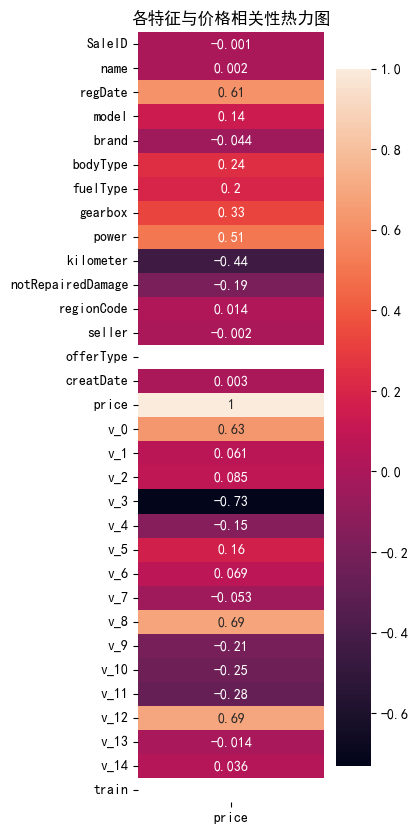

In [7]:
plt.figure(figsize=(3,10))
sns.heatmap(data.corr().loc[:,['price']], annot=True)
plt.title('各特征与价格相关性热力图')
plt.show()

### 步骤 7: 构造时间特征    
构造“使用时间”特征：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比。
不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'

In [6]:
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

看一下空数据，有一万多个样本的时间是有问题的，我们可以选择删除，也可以选择放着。    
但是这里不建议删除，因为删除缺失数据占总样本量过大，7.5%。    
我们可以先放着，如果使用树模型来预测，其本身就能处理缺失值，所以可以不用管。    

In [9]:
data['used_time'].isnull().sum()

15101

### 步骤 8: 利用业务知识提取地理信息    
因为是德国的数据，所以参考德国的邮编，相当于加入了先验知识，可以从邮编中提取城市信息。

In [7]:
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])

### 步骤 9: 查看特征的偏度和峰值      

In [23]:
# 删去预测值
numeric_features = list(data.columns)
numeric_features.remove('price')
# 循环查看每一个特征
for col in numeric_features:
    try:
        print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(data[col].kurt())  
         )
    except:
        # 无法计算出偏度和峰值的特征直接忽略
        pass

SaleID          Skewness: 00.00     Kurtosis: -01.20
name            Skewness: 00.56     Kurtosis: -01.04
regDate         Skewness: 00.03     Kurtosis: -00.69
model           Skewness: 01.49     Kurtosis: 001.75
brand           Skewness: 01.15     Kurtosis: 001.07
bodyType        Skewness: 00.99     Kurtosis: 000.21
fuelType        Skewness: 01.59     Kurtosis: 005.85
gearbox         Skewness: 01.32     Kurtosis: -00.26
power           Skewness: 84.74     Kurtosis: 12456.16
kilometer       Skewness: -1.52     Kurtosis: 001.14
notRepairedDamage Skewness: 02.44     Kurtosis: 003.94
regionCode      Skewness: 00.68     Kurtosis: -00.35
seller          Skewness: 447.21     Kurtosis: 200000.00
offerType       Skewness: 00.00     Kurtosis: 000.00
creatDate       Skewness: -82.93     Kurtosis: 7675.13
v_0             Skewness: -1.30     Kurtosis: 003.97
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.87     Kurtosis: 024.21
v_3             Skewness: 00.11     

### 步骤 10: 计算统计量，作为新特征加入数据表    
计算某品牌的销售统计量，同学们还可以计算其他特征的统计量。    
这里要以 train 的数据计算统计量。    

In [8]:
train_gb = train.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,train,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60.0,12.5,...,1,4385.0,1,10217.0,59900.0,1800.0,13.0,36902172.0,4681.293524,3611.49
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0.0,15.0,...,1,4757.0,4,13794.0,99900.0,6499.0,15.0,127916065.0,9369.631497,9272.64
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163.0,12.5,...,1,4382.0,2,1458.0,45000.0,8500.0,100.0,14373814.0,5425.058140,9851.83
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193.0,15.0,...,1,7125.0,,14249.0,98000.0,5400.0,15.0,120700489.0,8988.307535,8470.21
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68.0,5.0,...,1,1531.0,6,4665.0,31500.0,2300.0,20.0,15424120.0,3343.624586,3305.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116.0,15.0,...,0,7261.0,3,16737.0,99999.0,6000.0,12.0,142913696.0,8472.393191,8538.28
199996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75.0,15.0,...,0,6014.0,1,31480.0,68500.0,3199.0,13.0,174253290.0,6272.522119,5535.19
199997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224.0,15.0,...,0,4345.0,3,13794.0,99900.0,6499.0,15.0,127916065.0,9369.631497,9272.64
199998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334.0,15.0,...,0,NaN,1,13794.0,99900.0,6499.0,15.0,127916065.0,9369.631497,9272.64


### 步骤 11: 数据离散化    
    
1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
3. 离散化，能够提升模型的表达能力，加大拟合；
4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化。

此处以 power 为例。

In [26]:
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60.0
1,NaN,0.0
2,16.0,163.0
3,19.0,193.0
4,6.0,68.0


### 步骤 12: 删除无用原始特征    

In [27]:
# 查看现有特征
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'train', 'used_time', 'city', 'brand_amount_x',
       'brand_price_max_x', 'brand_price_median_x', 'brand_price_min_x',
       'brand_price_sum_x', 'brand_price_std_x', 'brand_price_average_x',
       'brand_amount_y', 'brand_price_max_y', 'brand_price_median_y',
       'brand_price_min_y', 'brand_price_sum_y', 'brand_price_std_y',
       'brand_price_average_y', 'power_bin'],
      dtype='object')

In [28]:
data_FE = data.drop(['SaleID', 'regDate', 'seller', 'offerType', 
                  'creatDate', 'regionCode'], axis=1)

In [30]:
# 查看留存特征
data_FE.columns

Index(['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'train', 'used_time', 'city', 'brand_amount_x',
       'brand_price_max_x', 'brand_price_median_x', 'brand_price_min_x',
       'brand_price_sum_x', 'brand_price_std_x', 'brand_price_average_x',
       'brand_amount_y', 'brand_price_max_y', 'brand_price_median_y',
       'brand_price_min_y', 'brand_price_sum_y', 'brand_price_std_y',
       'brand_price_average_y', 'power_bin'],
      dtype='object')

### 步骤 13: 保存完成特征处理的数据  

In [ ]:
data_FE.to_csv('used_car_data_FE.csv',index=False)

## 【任务总结】

特征工程主要目的在于将数据转换为能更好地表示潜在问题的特征，从而提高机器学习的性能。比如，异常值处理是为了去除噪声，填补缺失值可以加入先验知识等。特征构造也属于特征工程的一部分，其目的是为了增强数据的表达。    
有些特征是匿名特征，这导致我们并不清楚特征相互直接的关联性，这时我们就只有单纯基于特征进行处理，比如装箱，groupby，agg 等这样一些操作进行一些特征统计，此外还可以对特征进行进一步的 log，exp 等变换，或者对多个特征进行四则运算（如上面我们算出的使用时长），多项式组合等然后进行筛选。由于特性的匿名性其实限制了很多对于特征的处理，当然有些时候用 NN 去提取一些特征也会达到意想不到的良好效果。    
对于知道特征含义（非匿名）的特征工程，特别是在生产实际中，会基于信号处理，频域提取，丰度，偏度等构建更为有实际意义的特征，这就是结合背景的特征构建。这样一种特征构建往往要深入分析背后的业务逻辑或者说物理原理，才能提升预测效果。    
当然特征工程其实是和模型结合在一起的，需要对模型输入数据的类型、分布等有较多的了解。而对于特征的处理效果和特征重要性等往往要通过模型来验证。
总的来说，特征工程是入门简单，但精通非常难的一件事。